In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms

In [ ]:
dataset = pd.read_csv('November(Non_City).csv')

In [ ]:
dataset.head()

,Date,Year,Mean_Temperature (K),Mean Temperature (C),Unnamed: 4
0,"Nov 1, 2000",2000,298.032,24.882,NaN
1,"Nov 2, 2000",2000,297.859,24.709,NaN
2,"Nov 3, 2000",2000,298.019,24.869,NaN
3,"Nov 4, 2000",2000,297.387,24.237,NaN
4,"Nov 5, 2000",2000,296.344,23.194,NaN


In [ ]:
dmean = dataset['Mean Temperature (C)'].mean(skipna=True)
#dmean = 22.21

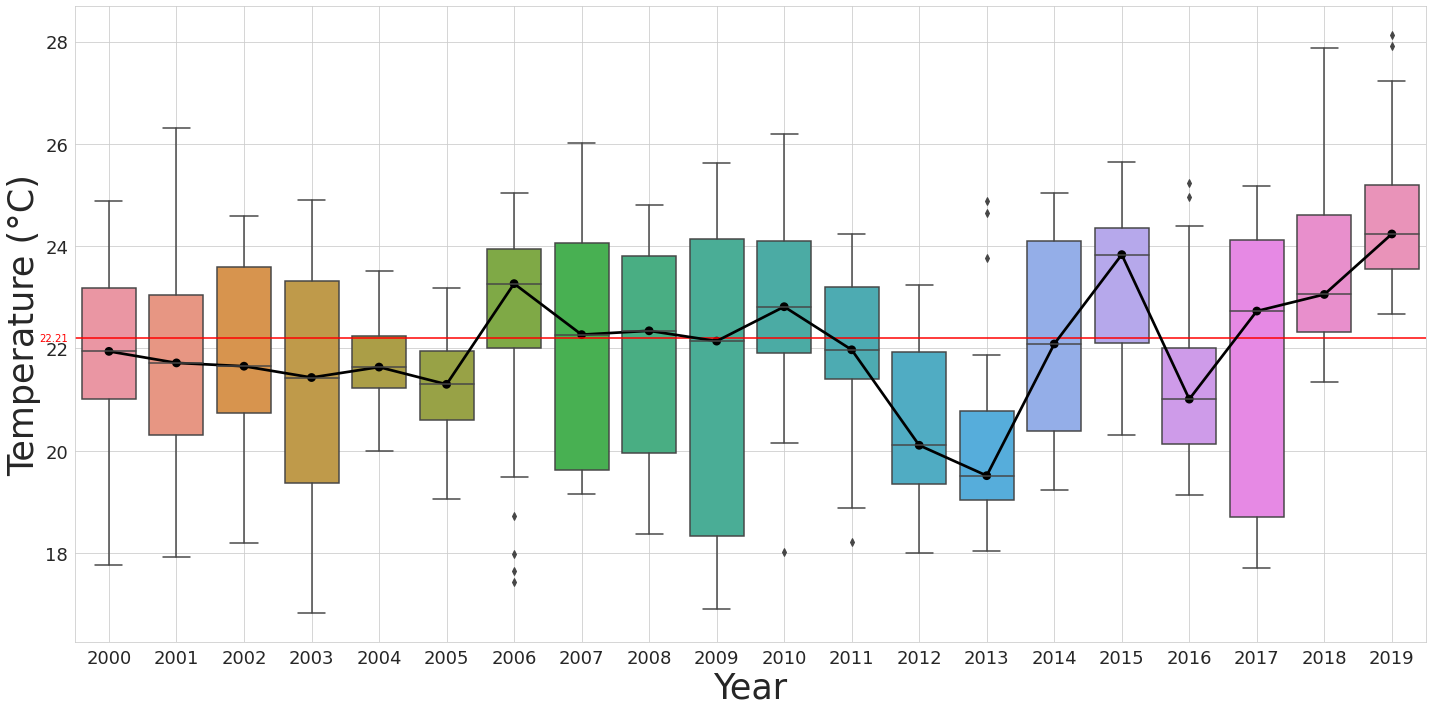

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
box_plot=sns.boxplot(x = 'Year', y = 'Mean Temperature (C)', data = dataset, width= 0.8)
medians = dataset.groupby(['Year'])['Mean Temperature (C)'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
#for tick,label in zip(pos,ax.get_xticklabels()):
    #ax.text(pos[tick], medians[tick] + 0.3, median_labels[tick], 
            #horizontalalignment='center', size=8, color='black')
plt.axhline(y = dmean, color = 'r', linestyle = '-')
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,dmean, "{:.2f}".format(dmean), color="red", transform=trans, 
        ha="right", va="center")
x_ticks0_labels = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
plt.yticks(size=18)
sns.pointplot(x='Year', y='Mean Temperature (C)', data=dataset.groupby('Year', as_index=False).median(), ax=ax, color='black')
ax.grid(True)
ax.set_xticklabels(x_ticks0_labels, rotation ='0', fontsize=18)
plt.xlabel("Year", size=35, )
plt.ylabel("Temperature (°C)", size=35, )
plt.tight_layout()
#plt.savefig("January(city)",dpi=1000,bbox_inches = 'tight')
plt.show()